# 파이토치 가중치 초기화

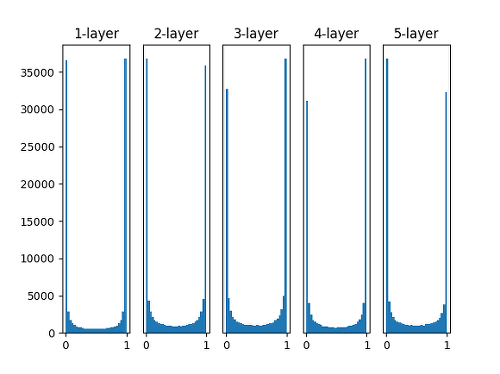

각 레이어에 기본적으로 설정된 가중치의 시각화 

### 가중치 초기화의 필요성

가중치의 기본값이 [0, 1] 범위에 설정되어 학습이 잘 이뤄지지 않는 경우가 있다.

같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도한다. 다시 말해 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화시킬 수 있다. 

기본 모델 준비 

In [3]:
import torch
import torch.nn as nn

In [4]:
# 파이토치 튜토리얼을 위한 기본 모델
class PytorchBaselineModel(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.linear = nn.Linear(input_dim, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

데이터셋 준비 

In [7]:
import pandas as pd
X_train = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_X.xls", header=None)
y_train = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_label.xls", header=None)

### 가중치 초기화의 두가지 대표적인 종류 
1. Xavier 초기화
2. He 초기화
  

1. Xavier 초기화   
ㄱ. uniform initialization  
ㄴ. normal initialization

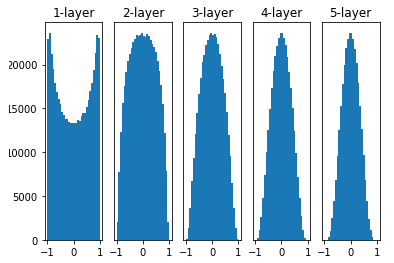

활성화 함수가 시그모이드(Sigmoid)인 신경망에서 잘 작동함 

In [8]:
# 모델 선언
input_dim = X_train.shape[1]
model = PytorchBaselineModel(input_dim)

In [11]:
# Xavier 초기화

# linear layer에 대한 xavier uniform initialization
nn.init.xavier_uniform_(model.linear.weight)

# linear layer에 대한 xavier normal initialization
nn.init.xavier_normal_(model.linear.weight)

Parameter containing:
tensor([[ 0.1279,  0.0740,  0.3136, -0.0314, -0.0161,  0.1155,  0.1958,  0.0067,
          0.2283,  0.3976,  0.2537, -0.0264,  0.1058, -0.1178, -0.0310, -0.0643,
          0.0106,  0.1166, -0.0839,  0.0838,  0.1755,  0.1155, -0.1898, -0.0280,
         -0.0742, -0.0586, -0.0057,  0.0344, -0.1932, -0.1942,  0.1246, -0.1345,
         -0.0402, -0.0288, -0.0235,  0.0234, -0.2036, -0.3602, -0.1315, -0.0968,
         -0.0741,  0.0652,  0.2209, -0.1125,  0.1858, -0.1491,  0.0952,  0.0082,
          0.1977,  0.1311,  0.4075,  0.1261,  0.2871, -0.0033, -0.1903, -0.0579,
          0.0881,  0.1116,  0.0429, -0.2688, -0.0022,  0.3133, -0.0666, -0.0183,
         -0.1315,  0.0546, -0.3543,  0.0637, -0.2040]], requires_grad=True)

활성화함수가 Relu일 경우 He 초기화가 유리함

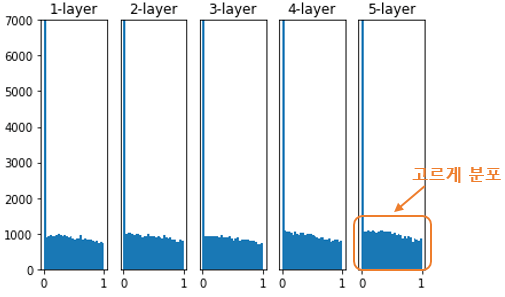


In [12]:
# He 초기화

# linear layer에 대한 He uniform initialization
nn.init.kaiming_uniform_(model.linear.weight)

# linear layer에 대한 He normal initialization
nn.init.kaiming_normal_(model.linear.weight)

Parameter containing:
tensor([[-0.1604, -0.0027, -0.2570, -0.0349, -0.1860, -0.1018, -0.0805, -0.0068,
         -0.0864, -0.0722, -0.2005,  0.0879, -0.0404,  0.0992, -0.0816, -0.0527,
         -0.0615, -0.1536,  0.1798, -0.1191,  0.0854,  0.1571, -0.0285,  0.1682,
          0.0971,  0.0380,  0.3068, -0.2166, -0.3454, -0.0674, -0.0940, -0.1968,
          0.1945,  0.2261, -0.2816,  0.0180, -0.0674, -0.0253,  0.0390, -0.0875,
         -0.0312, -0.0813,  0.0508,  0.0435,  0.1257, -0.1062, -0.1443,  0.2450,
          0.0189, -0.0615,  0.0048,  0.0795, -0.0256, -0.1985,  0.0678,  0.0062,
          0.2230,  0.1001,  0.0183,  0.0260, -0.0658,  0.1870, -0.2618,  0.0183,
          0.0233,  0.0724, -0.1384,  0.2592,  0.1440]], requires_grad=True)